DNA sequences are converted into 2D walks in which Ts, As, Cs, and Gs are up, down, left, and right, respectively. This gives each sequence a “shape.”

In [1]:
from Bio.SeqRecord import SeqRecord
from Bio import SeqIO

In [2]:
covid19 = SeqIO.read('covid19.fasta', 'fasta')
SARS = SeqIO.read('SARS.fasta', 'fasta')
MERS = SeqIO.read('MERS.fasta', 'fasta')
ebola = SeqIO.read('ebola.fasta', 'fasta')

In [6]:
import squiggle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [7]:
series1 = squiggle.squiggle.transform(covid19, method='gates', bar=False)
df = pd.DataFrame(series1)
df1 = df.T
df1 = df1.rename(columns={0:'x', 1:'y'})

In [9]:
series2 = squiggle.squiggle.transform(SARS, method='gates', bar=False)
dfn = pd.DataFrame(series2)
df2 = dfn.T
df2 = df2.rename(columns={0:'x', 1:'y'})

In [10]:
series3 = squiggle.squiggle.transform(MERS, method='gates', bar=False)
dfn1 = pd.DataFrame(series3)
df3 = dfn1.T
df3 = df3.rename(columns={0:'x', 1:'y'})

In [11]:
series4 = squiggle.squiggle.transform(ebola, method='gates', bar=False)
dfn2 = pd.DataFrame(series4)
df4 = dfn2.T
df4 = df4.rename(columns={0:'x', 1:'y'})

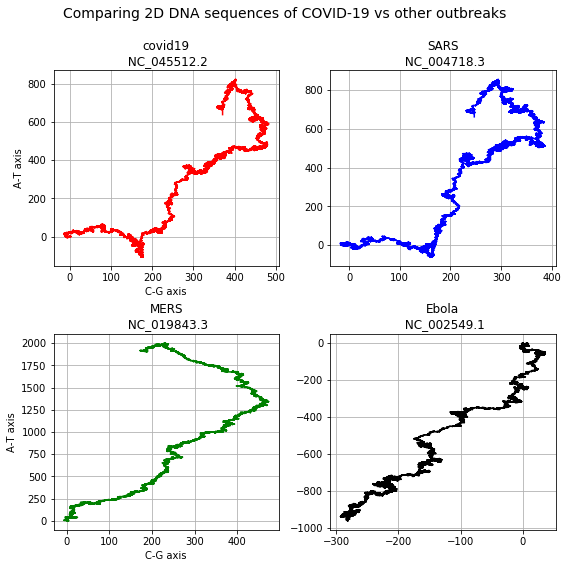

In [106]:
fig = plt.figure(figsize=(8,8))
fig.subplots_adjust(hspace=.4)
fig.suptitle('Comparing 2D DNA sequences of COVID-19 vs other outbreaks', fontsize=14)

ax1 = fig.add_subplot(2,2,1)
ax1.grid()
ax1.plot(df1['x'], df1['y'], 'r')
ax1.set_title('covid19\n NC_045512.2')
ax1.tick_params(axis='both', which='major')
ax1.set_xlabel('C-G axis')
ax1.set_ylabel('A-T axis')


ax2 = fig.add_subplot(2,2,2)
ax2.grid()
ax2.plot(df2['x'], df2['y'], 'b')
ax2.set_title('SARS\n NC_004718.3')
ax2.tick_params(axis='both', which='major')

ax3 = fig.add_subplot(2,2,3)
ax3.grid()
ax3.plot(df3['x'], df3['y'], 'g')
ax3.set_title('MERS\n NC_019843.3')
ax3.tick_params(axis='both', which='major')
ax3.set_xlabel('C-G axis')
ax3.set_ylabel('A-T axis')

ax4 = fig.add_subplot(2,2,4)
ax4.grid()
ax4.plot(df4['x'], df4['y'], 'k')
ax4.set_title('Ebola\n NC_002549.1')
ax4.tick_params(axis='both', which='major')

fig.tight_layout()
fig.subplots_adjust(top=0.87)

plt.savefig('twobytwo.png', bbox_inches='tight')

plt.show()

In [30]:
print('covid19 :', covid19.id)
print('SARS :', SARS.id)
print('MERS :', MERS.id)
print('Ebola:', ebola.id)

covid19 : NC_045512.2
SARS : NC_004718.3
MERS : NC_019843.3
Ebola: NC_002549.1


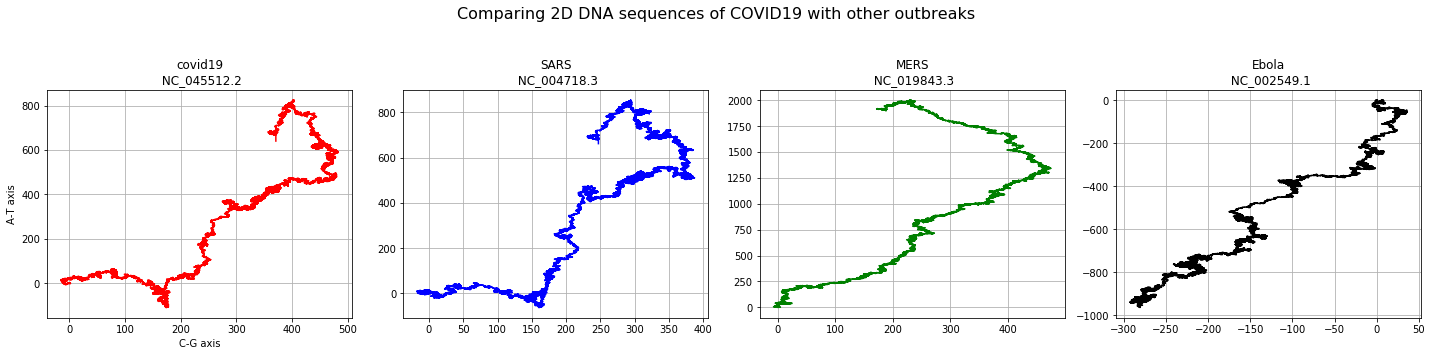

In [63]:
fig = plt.figure(figsize=(20,5))
fig.subplots_adjust(hspace=.6)
fig.suptitle('Comparing 2D DNA sequences of COVID19 with other outbreaks', fontsize=16)

ax1 = fig.add_subplot(1,4,1)
ax1.grid()
ax1.plot(df1['x'], df1['y'], 'r')
ax1.set_title('covid19\n NC_045512.2')
ax1.tick_params(axis='both', which='major')
ax1.set_xlabel('C-G axis')
ax1.set_ylabel('A-T axis')


ax2 = fig.add_subplot(1,4,2)
ax2.grid()
ax2.plot(df2['x'], df2['y'], 'b')
ax2.set_title('SARS\n NC_004718.3')
ax2.tick_params(axis='both', which='major')

ax3 = fig.add_subplot(1,4,3)
ax3.grid()
ax3.plot(df3['x'], df3['y'], 'g')
ax3.set_title('MERS\n NC_019843.3')
ax3.tick_params(axis='both', which='major')


ax4 = fig.add_subplot(1,4,4)
ax4.grid()
ax4.plot(df4['x'], df4['y'], 'k')
ax4.set_title('Ebola\n NC_002549.1')
ax4.tick_params(axis='both', which='major')

fig.tight_layout()
fig.subplots_adjust(top=0.75)

plt.show()

As we can observe the DNA structure of COV2 and SARS are almost identical, while that of MERS is a little different than the two.

Now let us use the Sequence alignment technique to compare the similarity among all the DNA sequences.

Sequence alignment is the process of arranging two or more sequences (of DNA, RNA, or protein sequences) in a specific order to identify the region of similarity between them.

Identifying the similar region enables us to infer a lot of information like what traits are conserved between species, how close different species genetically are, how species evolve, etc.

Pairwise sequence alignment compares only two sequences at a time and provides the best possible sequence alignments. Pairwise is easy to understand and exceptional to infer from the resulting sequence alignment.

In [65]:
from Bio import pairwise2 

In [84]:
SARS_COV = pairwise2.align.globalxx(covid19.seq, SARS.seq, one_alignment_only=True, score_only=True)

In [85]:
print('SARS/COV Similarity (%):', SARS_COV / len(SARS.seq) * 100)

SARS/COV Similarity (%): 83.33837518066619


In [86]:
MERS_COV = pairwise2.align.globalxx(covid19.seq, MERS.seq, one_alignment_only=True, score_only=True)

In [87]:
print('MERS/COV Similarity (%):', MERS_COV / len(MERS.seq) * 100)

MERS/COV Similarity (%): 69.39141405757164


In [98]:
Ebola_COV = pairwise2.align.globalxx(covid19.seq , ebola.seq , one_alignment_only=True, score_only=True)

In [100]:
print('Ebola/COV Similarity (%):', Ebola_COV / len(ebola.seq) * 100)

Ebola/COV Similarity (%): 80.11498496756158


#### Method2 : considering upto 100 in sequence

In [92]:
Ebola_COV = pairwise2.align.globalxx(covid19.seq[0:100] , ebola.seq[0:100] , one_alignment_only=True, score_only=True)

In [93]:
Ebola_COV

58.0

In [94]:
MERS_COV = pairwise2.align.globalxx(covid19.seq[0:100] , MERS.seq[0:100] , one_alignment_only=True, score_only=True)

In [95]:
MERS_COV

71.0

In [96]:
SARS_COV = pairwise2.align.globalxx(covid19.seq[0:100] , SARS.seq[1:100] , one_alignment_only=True, score_only=True)

In [97]:
SARS_COV

89.0

Method 2, seems to produce more stable results when considering Ebola